In [35]:
from PIL import Image
from PIL import ImageDraw, ImageFont

Zad 1

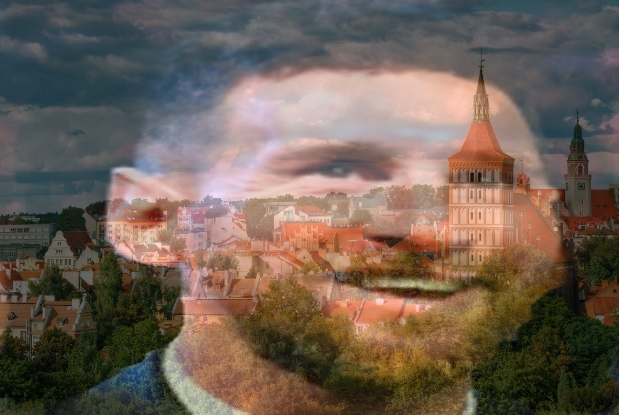

In [36]:
im1 = Image.open("olsztyn.jpg").convert("RGB")
im2 = Image.open("messi.jpg").convert("RGB")

if im1.size != im2.size:
    im2 = im2.resize(im1.size)

im_blend = Image.blend(im1,im2,alpha=0.6)

im_blend.save("mieszany_obraz.jpg")
im_blend

![obraz_pierwszy](mieszany_obraz.jpg)

Zad 2 a)

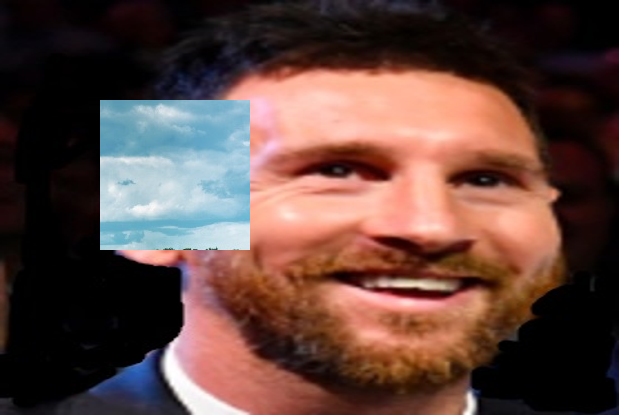

In [37]:
box = (50,50,200,200)
fragment = im1.crop(box)

im2_copy = im2.copy()
im2_copy.paste(fragment,(100,100))
im2_copy

![zdjecie_drugie](wycinek_wklejony.jpg)

Zad 2 b-e

In [38]:
#2b
maska = Image.new("L", im1.size, 0)
draw = ImageDraw.Draw(maska)
draw.ellipse(box,fill=255)

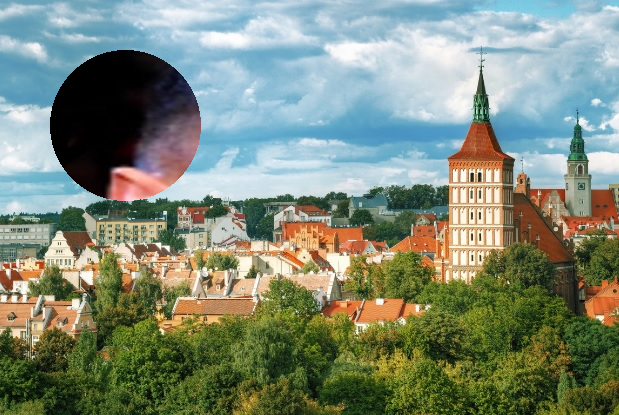

In [39]:
#2c
im1_mask = im1.copy()
im1_mask.paste(im2,(0,0),maska)

im1_mask.save("im_maska.jpg")
im1_mask

![zdjecie_trzecie](im_maska.jpg)

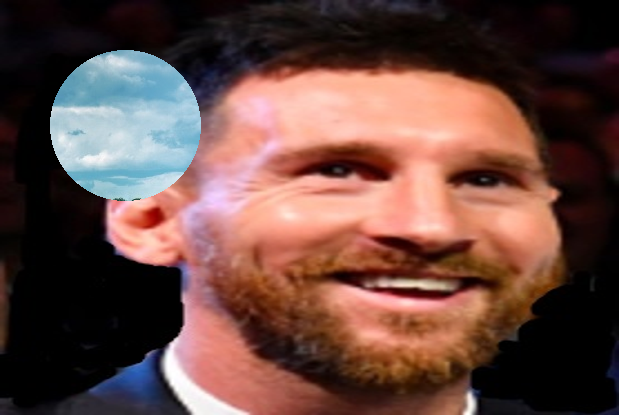

In [40]:
#2d
im2_mask = im2.copy()
im2_mask.paste(im1,(0,0),maska)
im2_mask.save("im_maska2.jpg")
im2_mask

![zdjecie_czwarte](im_maska2.jpg)

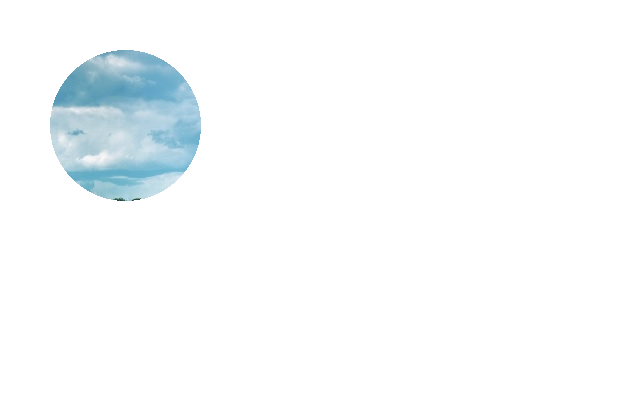

In [41]:
#2e

im1_alpha = im1.copy()
im1_alpha.putalpha(maska)

im1_alpha.save("im1_alpha.png")
im1_alpha

![zdjecie](im1_alpha.png)

Zad 3

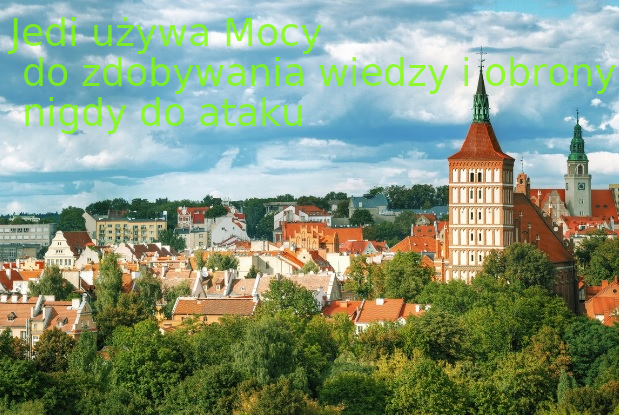

In [42]:
#3a
font = ImageFont.truetype("DejaVuSans.ttf", size=38)
im3 = Image.open("olsztyn.jpg").convert('RGB')
tekst = "Jedi używa Mocy \n do zdobywania wiedzy i obrony, \n nigdy do ataku"
obraz_text = im3.copy()
draw = ImageDraw.Draw(obraz_text)
draw.text((10, 10), tekst, font=font, fill="chartreuse")

obraz_text.save("tekst_na_obrazie.jpg")
# obraz_text.show()

#3b
tekst_overlay = Image.new("RGBA", im3.size, (0, 0, 0, 0))
draw = ImageDraw.Draw(tekst_overlay)
draw.text((10, 10), tekst, font=font, fill=(127, 255, 0, 200))  # chartreuse z alfa

tekst_na_przezroczystosci = Image.alpha_composite(im3.convert("RGBA"), tekst_overlay)
tekst_na_przezroczystosci

![Zdjecie_piate](tekst_na_obrazie.jpg)

![Zdjecie_szoste](tekst_przezroczystosc.png)

Zad 4

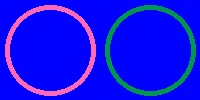

In [43]:
#4a

im_circles = Image.new("RGB", (200,100), "blue")
draw = ImageDraw.Draw(im_circles)

draw.ellipse((5,5,95,95), outline="#ff69b4", width=5)

negatyw_kolor = tuple(255 - c for c in (255,105,180))
draw.ellipse((105,5,195,95), outline=negatyw_kolor, width=5)

im_circles.save("okręgi.jpg")
im_circles

![zdjecie_siodme](okręgi.jpg)

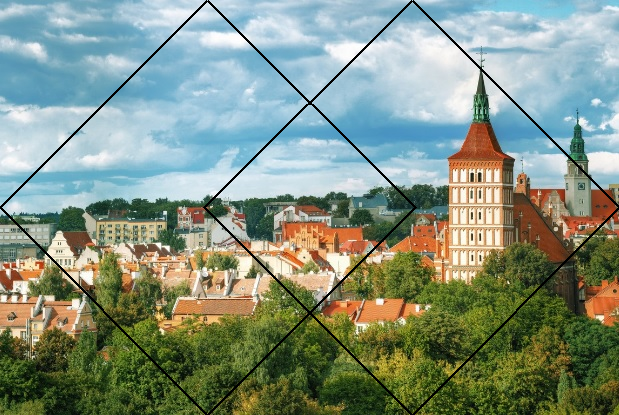

In [44]:
#4b
def narysuj_kwadraty(obraz):
    draw = ImageDraw.Draw(obraz)
    w, h = obraz.size
    size = h
    # Lewy kwadrat - punkty (obrócony o 45 stopni)
    lewy_kwadrat = [
        (0, h // 2),
        (size // 2, 0),
        (size, h // 2),
        (size // 2, h),
        (0, h // 2)
    ]

    # Prawy kwadrat - punkty (obrócony o 45 stopni)
    prawy_kwadrat = [
        (w - size, h // 2),
        (w - size // 2, 0),
        (w, h // 2),
        (w - size // 2, h),
        (w - size, h // 2)
    ]
    draw.line(lewy_kwadrat, fill='black', width=2)
    draw.line(prawy_kwadrat, fill='black', width=2)

    return obraz

im1_kw = narysuj_kwadraty(im1)
im1_kw

![zdjecie_dziewiate](kwadraty.jpg)